In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

root_dir = "content/drive/My Drive/"

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/pregatire-iaio-ziua-1.zip'

Archive:  /content/drive/MyDrive/pregatire-iaio-ziua-1.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/train.csv')
pd.set_option('display.max_columns', None)

In [5]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


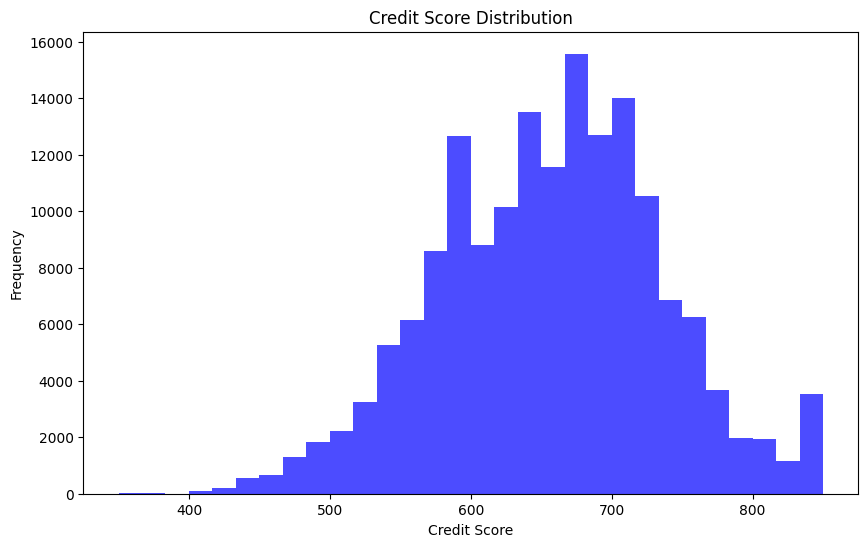

In [9]:
plt.figure(figsize = (10, 6))
plt.hist(df['CreditScore'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

In [12]:
df['Geography'].value_counts()
# The data for the Geography is imbalanced

,count
Geography,
France,94215
Spain,36213
Germany,34606


In [13]:
#Label encoding the countries
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography_encoded'] = le.fit_transform(df['Geography'])

In [14]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,2
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,2


In [15]:
df['Gender'].value_counts()

,count
Gender,
Male,93150
Female,71884


In [16]:
df = pd.get_dummies(df, columns = ['Gender'])

In [17]:
df

,id,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_Female,Gender_Male
0,0,15674932,Okwudilichukwu,668,France,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,False,True
1,1,15749177,Okwudiliolisa,627,France,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,False,True
2,2,15694510,Hsueh,678,France,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,False,True
3,3,15741417,Kao,581,France,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,False,True
4,4,15766172,Chiemenam,716,Spain,33.0,5,0.00,2,1.0,1.0,15068.83,0,2,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,33.0,2,0.00,1,1.0,1.0,131834.75,0,2,True,False
165030,165030,15665521,Okechukwu,792,France,35.0,3,0.00,1,0.0,0.0,131834.45,0,0,False,True
165031,165031,15664752,Hsia,565,France,31.0,5,0.00,1,1.0,1.0,127429.56,0,0,False,True
165032,165032,15689614,Hsiung,554,Spain,30.0,7,161533.00,1,0.0,1.0,71173.03,0,2,True,False


Text(0, 0.5, 'Frequency')

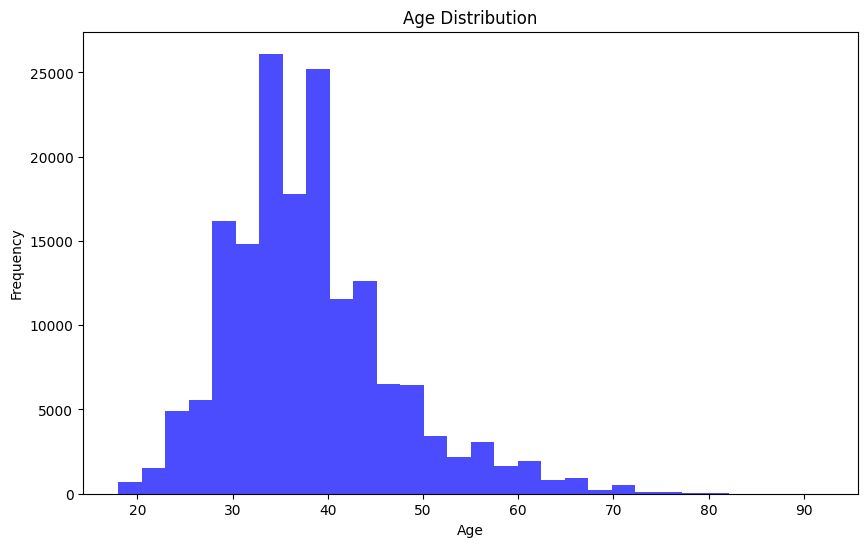

In [18]:
plt.figure(figsize = (10, 6))
plt.hist(df['Age'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [19]:
df['Tenure'].value_counts()

,count
Tenure,
2,18045
7,17810
4,17554
8,17520
5,17268
1,16760
9,16709
3,16630
6,15822


Text(0, 0.5, 'Frequency')

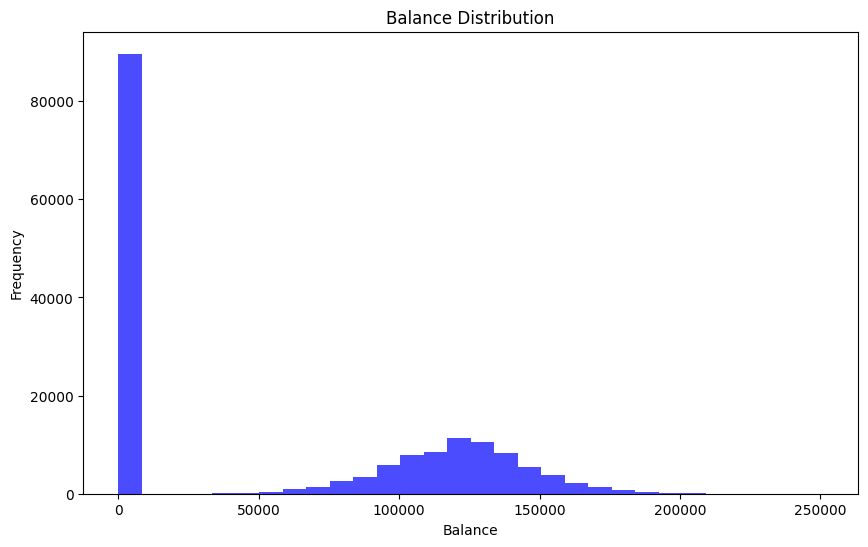

In [20]:
plt.figure(figsize = (10, 6))
plt.hist(df['Balance'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

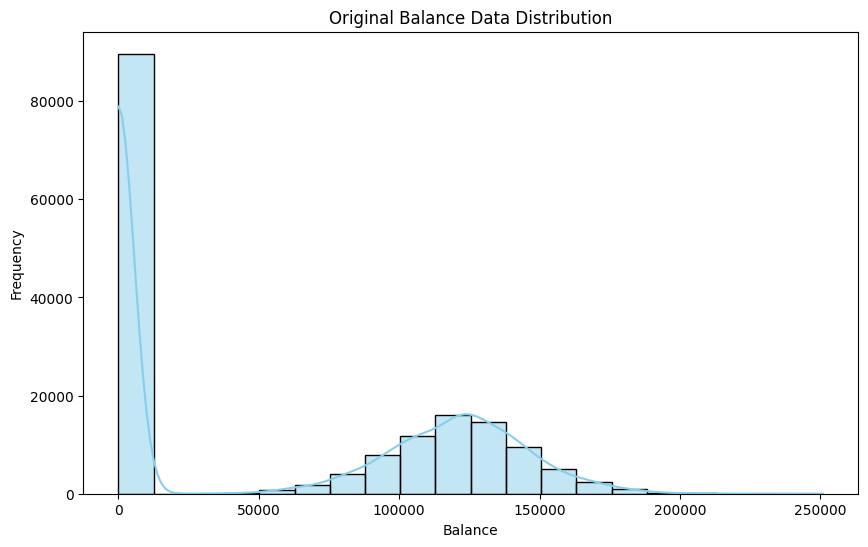

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


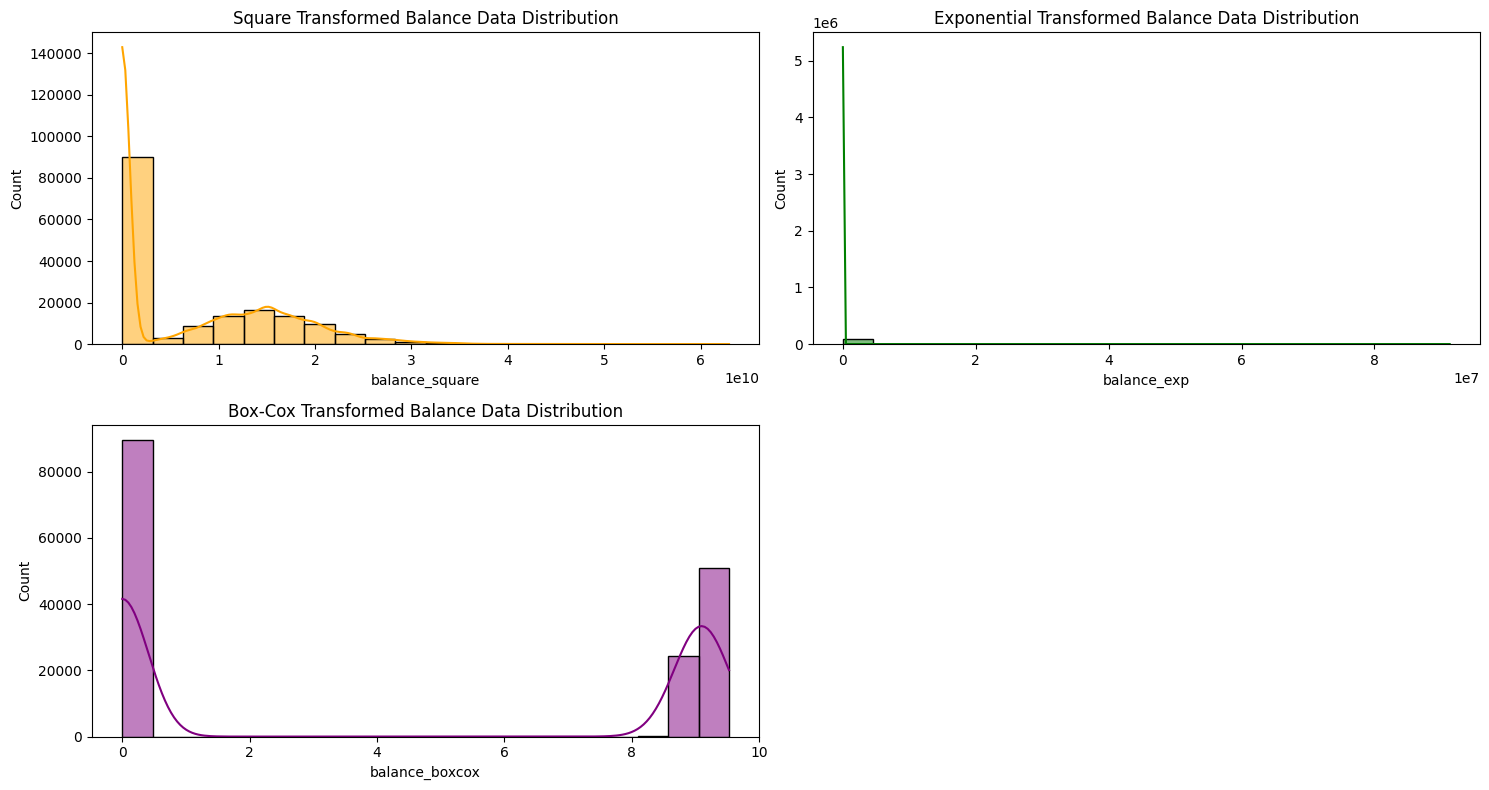

In [22]:
import numpy as np
from scipy import stats

plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], kde=True, color='skyblue', bins=20)
plt.title('Original Balance Data Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Apply a square transformation to reduce left skewness
df['balance_square'] = df['Balance'] ** 2

# Apply an exponential transformation (exp) to reduce left skewness
df['balance_exp'] = np.exp(df['Balance'])

# Apply a Box-Cox transformation (only works on strictly positive data)
df['balance_positive'] = df['Balance'] + 1  # Shift data to be strictly positive if needed
df['balance_boxcox'], _ = stats.boxcox(df['balance_positive'])

# Plot transformed data distributions
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['balance_square'], kde=True, color='orange', bins=20)
plt.title('Square Transformed Balance Data Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['balance_exp'], kde=True, color='green', bins=20)
plt.title('Exponential Transformed Balance Data Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['balance_boxcox'], kde=True, color='purple', bins=20)
plt.title('Box-Cox Transformed Balance Data Distribution')

plt.tight_layout()
plt.show()

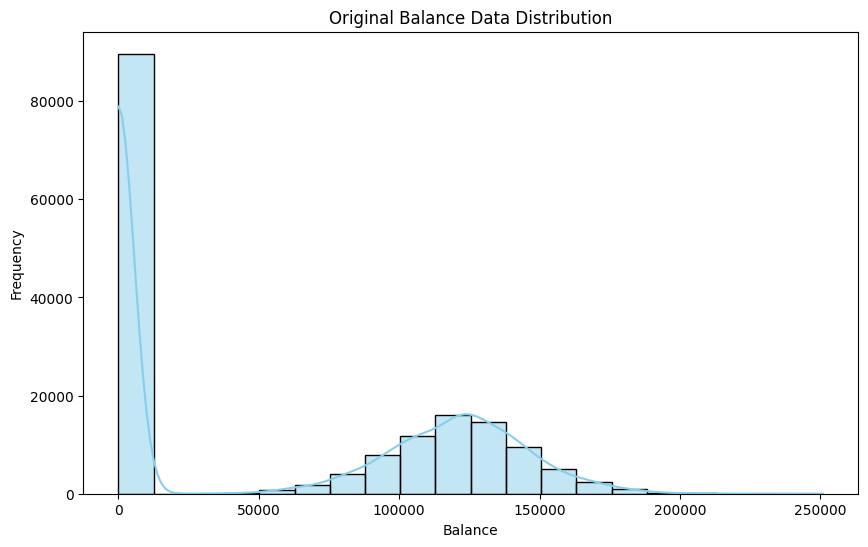

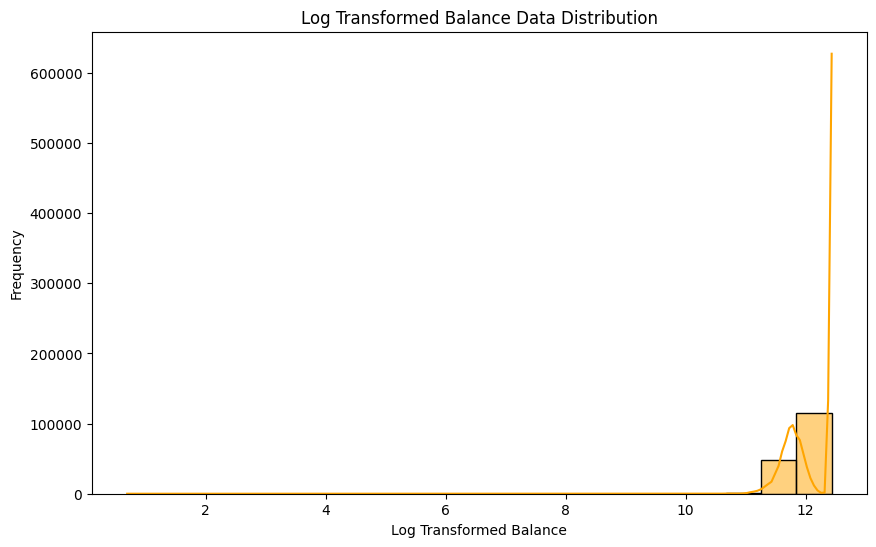

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], kde=True, color='skyblue', bins=20)
plt.title('Original Balance Data Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Step 1: Reverse the skewness direction
max_balance = df['Balance'].max()
df['balance_reversed'] = max_balance + 1 - df['Balance']

# Step 2: Apply log transformation
# Adding 1 to avoid log(0) which is undefined
df['balance_log'] = np.log(df['balance_reversed'] + 1)

# Plot transformed data distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['balance_log'], kde=True, color='orange', bins=20)
plt.title('Log Transformed Balance Data Distribution')
plt.xlabel('Log Transformed Balance')
plt.ylabel('Frequency')
plt.show()

In [24]:
df

,id,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_Female,Gender_Male,balance_square,balance_exp,balance_positive,balance_boxcox,balance_reversed,balance_log
0,0,15674932,Okwudilichukwu,668,France,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
1,1,15749177,Okwudiliolisa,627,France,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
2,2,15694510,Hsueh,678,France,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
3,3,15741417,Kao,581,France,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,False,True,2.216601e+10,inf,148883.54,9.224872,102016.55,11.532900
4,4,15766172,Chiemenam,716,Spain,33.0,5,0.00,2,1.0,1.0,15068.83,0,2,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,33.0,2,0.00,1,1.0,1.0,131834.75,0,2,True,False,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
165030,165030,15665521,Okechukwu,792,France,35.0,3,0.00,1,0.0,0.0,131834.45,0,0,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
165031,165031,15664752,Hsia,565,France,31.0,5,0.00,1,1.0,1.0,127429.56,0,0,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
165032,165032,15689614,Hsiung,554,Spain,30.0,7,161533.00,1,0.0,1.0,71173.03,0,2,True,False,2.609291e+10,inf,161534.00,9.272552,89366.09,11.400508


In [28]:
df['balance_log'].max()

12.432810091063098

In [29]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
2,84291
1,77374
3,2894
4,475


Text(0.5, 0, 'NoProducts')

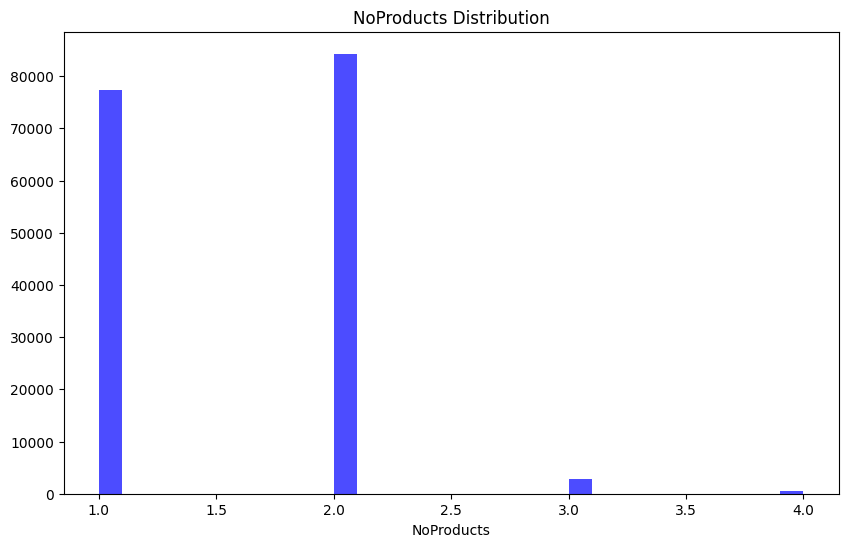

In [30]:
plt.figure(figsize = (10, 6))
plt.hist(df['NumOfProducts'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('NoProducts Distribution')
plt.xlabel('NoProducts')

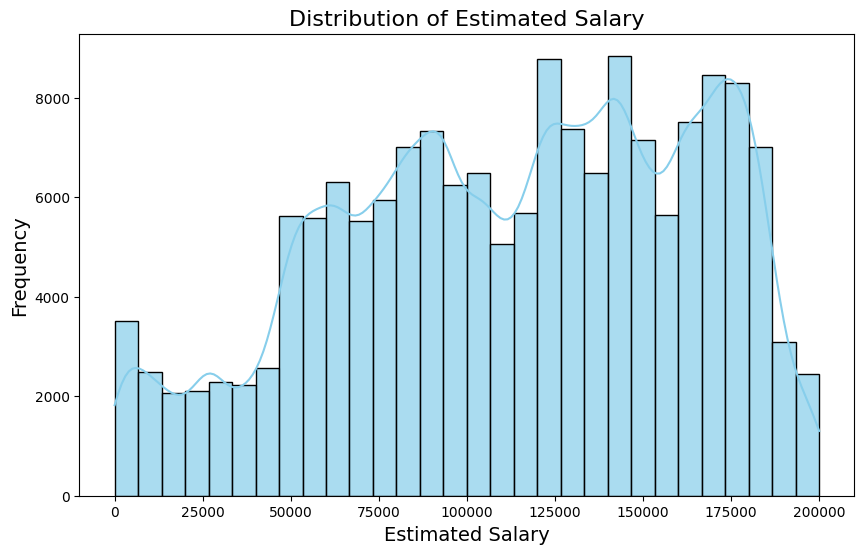

In [33]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df['EstimatedSalary'], color = 'skyblue', alpha = 0.7, bins = 30, kde = True)
plt.title('Distribution of Estimated Salary', fontsize = 16)
plt.xlabel('Estimated Salary', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.show()

In [34]:
df

,id,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_Female,Gender_Male,balance_square,balance_exp,balance_positive,balance_boxcox,balance_reversed,balance_log
0,0,15674932,Okwudilichukwu,668,France,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
1,1,15749177,Okwudiliolisa,627,France,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
2,2,15694510,Hsueh,678,France,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
3,3,15741417,Kao,581,France,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,False,True,2.216601e+10,inf,148883.54,9.224872,102016.55,11.532900
4,4,15766172,Chiemenam,716,Spain,33.0,5,0.00,2,1.0,1.0,15068.83,0,2,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,33.0,2,0.00,1,1.0,1.0,131834.75,0,2,True,False,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
165030,165030,15665521,Okechukwu,792,France,35.0,3,0.00,1,0.0,0.0,131834.45,0,0,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
165031,165031,15664752,Hsia,565,France,31.0,5,0.00,1,1.0,1.0,127429.56,0,0,False,True,0.000000e+00,1.0,1.00,0.000000,250899.09,12.432810
165032,165032,15689614,Hsiung,554,Spain,30.0,7,161533.00,1,0.0,1.0,71173.03,0,2,True,False,2.609291e+10,inf,161534.00,9.272552,89366.09,11.400508


In [35]:
X = df[[
    'CreditScore',
    'Age',
    'Tenure',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'EstimatedSalary',
    'Geography_encoded',
    'Gender_Female',
    'Gender_Male',
    'balance_log'
]]

In [36]:
y = df['Exited']

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        165034 non-null  int64  
 1   Age                165034 non-null  float64
 2   Tenure             165034 non-null  int64  
 3   NumOfProducts      165034 non-null  int64  
 4   HasCrCard          165034 non-null  float64
 5   IsActiveMember     165034 non-null  float64
 6   EstimatedSalary    165034 non-null  float64
 7   Geography_encoded  165034 non-null  int64  
 8   Gender_Female      165034 non-null  bool   
 9   Gender_Male        165034 non-null  bool   
 10  balance_log        165034 non-null  float64
dtypes: bool(2), float64(5), int64(4)
memory usage: 11.6 MB


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [45]:
X_train_smote.shape

(221150, 11)

In [56]:
# output binar, task de clasificare
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier

In [60]:
# Random Forest Classifier
model = RandomForestClassifier(random_state = 42)
model.fit(X_train_smote, y_train_smote)
y_preds = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_preds)

0.871382250217667

In [61]:
# GradientBoosting Classifier
model = GradientBoostingClassifier(random_state = 42)
model.fit(X_train, y_train)
y_preds = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_preds)

0.8901800771842596

In [62]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print(f'Cross-validated ROC AUC scores: {scores}')

Cross-validated ROC AUC scores: [0.88659688 0.88555414 0.88834047 0.88921753 0.88739864]


In [66]:
df_testing = pd.read_csv('/content/test.csv')
df_testing

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


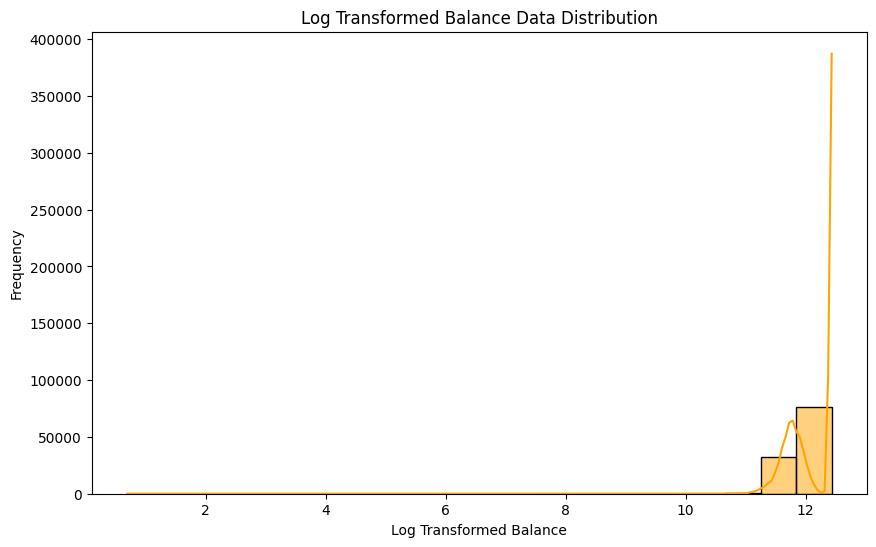

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_testing['Geography_encoded'] = le.fit_transform(df_testing['Geography'])
df_testing = pd.get_dummies(df_testing, columns = ['Gender'])

# Step 1: Reverse the skewness direction
max_balance = df_testing['Balance'].max()
df_testing['balance_reversed'] = max_balance + 1 - df_testing['Balance']

# Step 2: Apply log transformation
# Adding 1 to avoid log(0) which is undefined
df_testing['balance_log'] = np.log(df_testing['balance_reversed'] + 1)

# Plot transformed data distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_testing['balance_log'], kde=True, color='orange', bins=20)
plt.title('Log Transformed Balance Data Distribution')
plt.xlabel('Log Transformed Balance')
plt.ylabel('Frequency')
plt.show()
plt.show()

In [68]:
df_testing

,id,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_encoded,Gender_Female,Gender_Male,balance_reversed,balance_log
0,165034,15773898,Lucchese,586,France,23.0,2,0.00,2,0.0,1.0,160976.75,0,True,False,250899.09,12.432810
1,165035,15782418,Nott,683,France,46.0,2,0.00,1,1.0,0.0,72549.27,0,True,False,250899.09,12.432810
2,165036,15807120,K?,656,France,34.0,7,0.00,2,1.0,0.0,138882.09,0,True,False,250899.09,12.432810
3,165037,15808905,O'Donnell,681,France,36.0,8,0.00,1,1.0,0.0,113931.57,0,False,True,250899.09,12.432810
4,165038,15607314,Higgins,752,Germany,38.0,10,121263.62,1,1.0,0.0,139431.00,1,False,True,129635.47,11.772489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,29.0,7,116099.82,1,1.0,1.0,148087.62,2,False,True,134799.27,11.811549
110019,275053,15774133,Cox,575,France,36.0,4,178032.53,1,1.0,1.0,42181.68,0,True,False,72866.56,11.196399
110020,275054,15728456,Ch'iu,712,France,31.0,2,0.00,2,1.0,0.0,16287.38,0,False,True,250899.09,12.432810
110021,275055,15687541,Yegorova,709,France,32.0,3,0.00,1,1.0,1.0,158816.58,0,True,False,250899.09,12.432810


In [69]:
X_testing = df_testing[[
    'CreditScore',
    'Age',
    'Tenure',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'EstimatedSalary',
    'Geography_encoded',
    'Gender_Female',
    'Gender_Male',
    'balance_log'
]]

In [70]:
X_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        110023 non-null  int64  
 1   Age                110023 non-null  float64
 2   Tenure             110023 non-null  int64  
 3   NumOfProducts      110023 non-null  int64  
 4   HasCrCard          110023 non-null  float64
 5   IsActiveMember     110023 non-null  float64
 6   EstimatedSalary    110023 non-null  float64
 7   Geography_encoded  110023 non-null  int64  
 8   Gender_Female      110023 non-null  bool   
 9   Gender_Male        110023 non-null  bool   
 10  balance_log        110023 non-null  float64
dtypes: bool(2), float64(5), int64(4)
memory usage: 7.8 MB


In [73]:
output = pd.DataFrame({'id' : df_testing['id'], 'Exited' : model.predict_proba(X_testing)[:, 1]})
output.to_csv('submission.csv', index = False)
output

,id,Exited
0,165034,0.022564
1,165035,0.826251
2,165036,0.033338
3,165037,0.248725
4,165038,0.310164
...,...,...
110018,275052,0.053221
110019,275053,0.077326
110020,275054,0.022763
110021,275055,0.150444


In [74]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>